In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [16]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [17]:
gfs_forecast_data = pd.read_csv("./gfs_forecast_data.csv")
gfs_forecast_data = gfs_forecast_data.drop(columns = 'Unnamed: 0')
gfs_forecast_data['city'] = gfs_forecast_data['city'].replace('taipei', 'Taipei').replace('la', 'Los Angeles (SoCAB)').replace('delhi', 'Delhi') 
grid_meta_data = pd.read_csv("./grid_metadata.csv")
all_training_labels = pd.read_csv("./train_labels.csv")
all_training_labels['Date'] =  pd.to_datetime(all_training_labels['datetime'], format='%Y-%m-%d')
all_training_labels['Date'] = [x[0:10] for x in all_training_labels['Date'].astype(str)]

eda_df = all_training_labels.merge(grid_meta_data, on = 'grid_id')

In [4]:
all_training_labels['Date'] =  pd.to_datetime(all_training_labels['datetime'], format='%Y-%m-%d')
all_training_labels['Date'] = [x[0:10] for x in all_training_labels['Date'].astype(str)]

In [5]:
eda_df = gfs_forecast_data.merge(eda_df, left_on = ['date', 'city'], right_on=['Date', 'location'])

In [6]:
var_correlations = pd.DataFrame({'col':eda_df.columns[:-9], 'corr': [np.corrcoef(eda_df[col], eda_df['value'])[1][0] for col in eda_df.columns[:-9]]  })

/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [7]:
var_correlations = var_correlations.sort_values(by='corr')

-0.5299071488593093


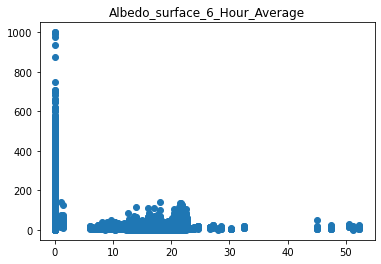

-0.44484739816551033


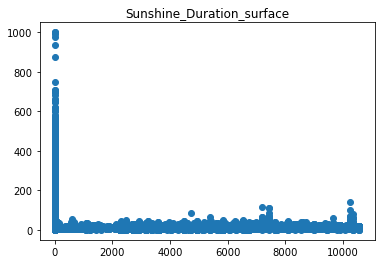

-0.42708435668688344


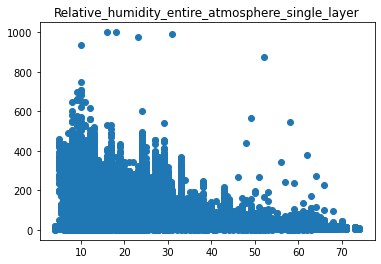

-0.4256188254570972


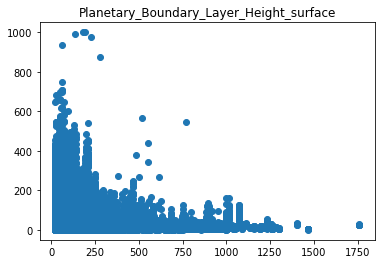

-0.3905072294823924


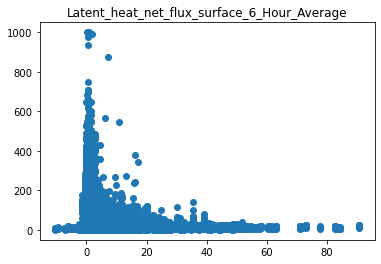

-0.38687512429182436


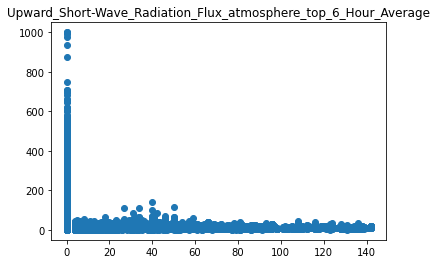

-0.35764658761844664


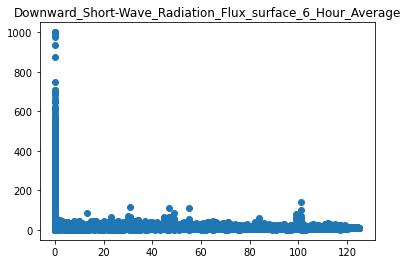

-0.35355304615458427


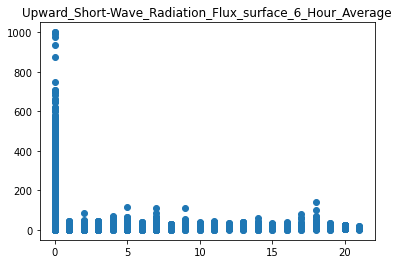

-0.3458090380021384


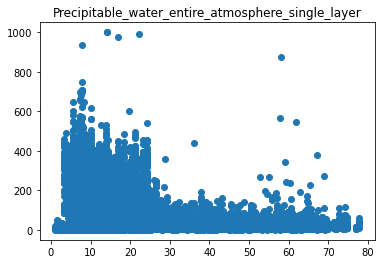

-0.3169419041188018


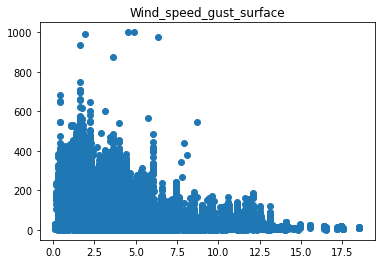

-0.2944723465565695


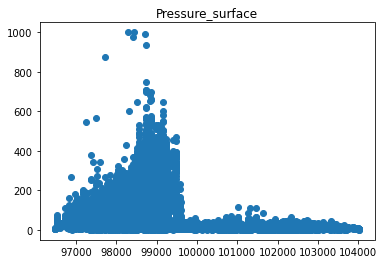

-0.2883715388378976


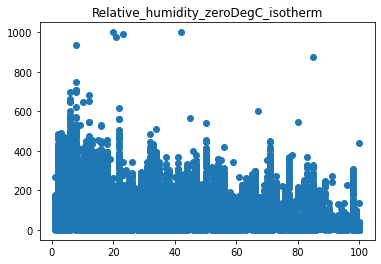

-0.2862827896189141


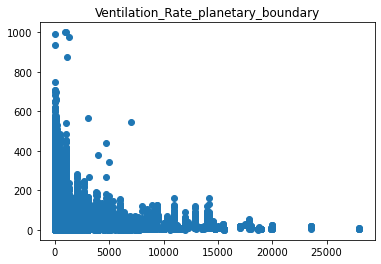

-0.2837508169407805


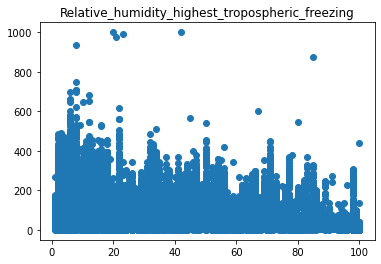

-0.25164521646645116


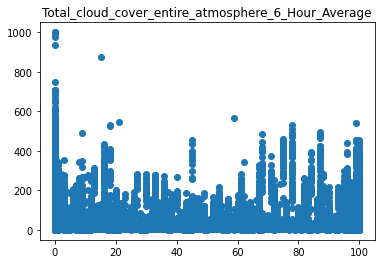

-0.24203663002415943


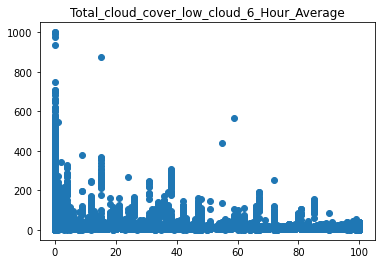

-0.1927838925780302


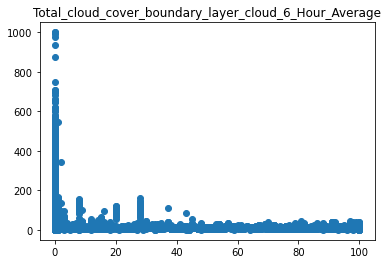

-0.19264636533068033


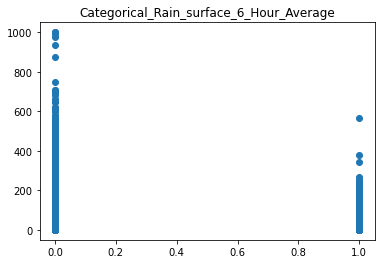

-0.18356454067763017


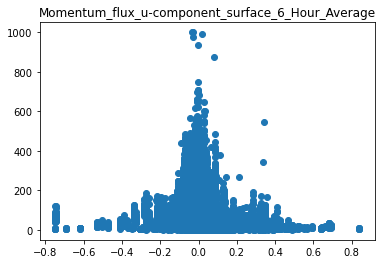

-0.18255667187458188


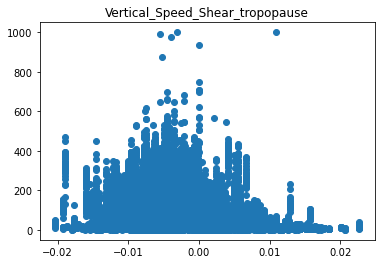

-0.18070870141232198


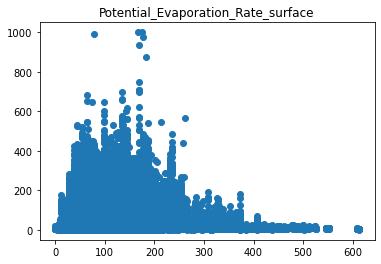

-0.17985746782391426


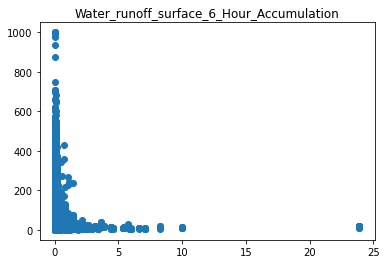

-0.17690268186366365


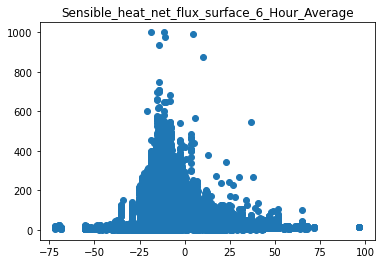

-0.17494118550795065


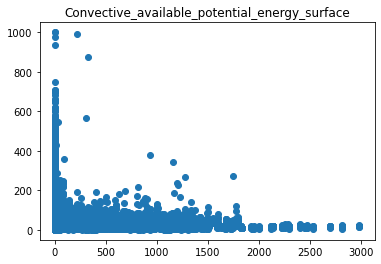

-0.17422566138018045


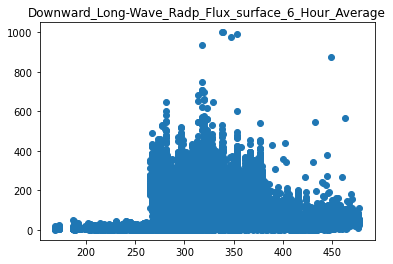

-0.16001059669858372


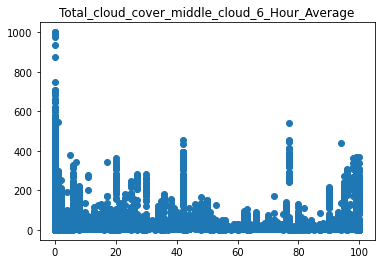

-0.15903430156386175


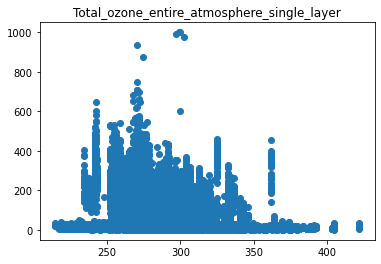

-0.15097560294098367


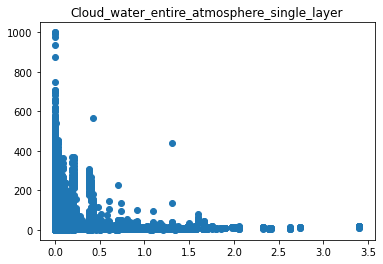

-0.1422811072528429


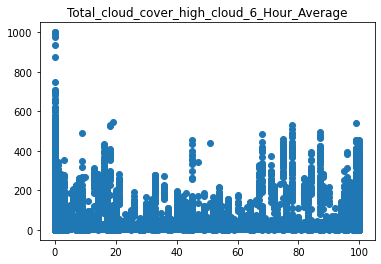

-0.1089207945224826


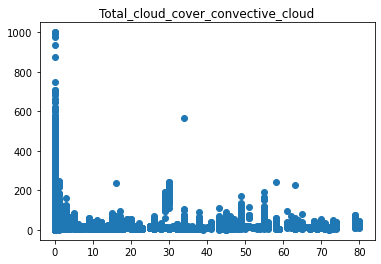

-0.10368756412442778


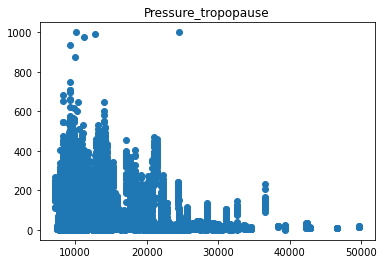

-0.0934136107792195


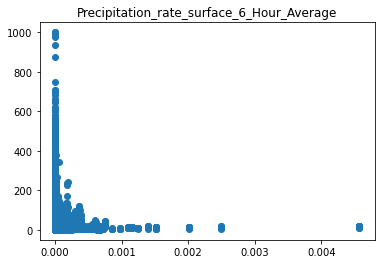

-0.09307707983020382


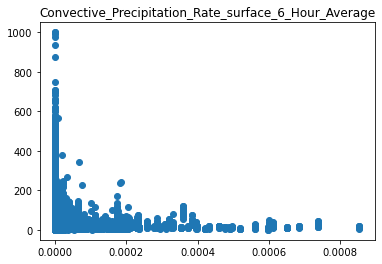

-0.0782754830202794


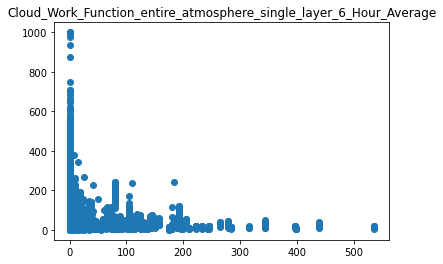

-0.06185531504631826


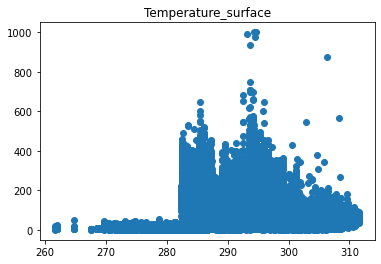

-0.04213677131270743


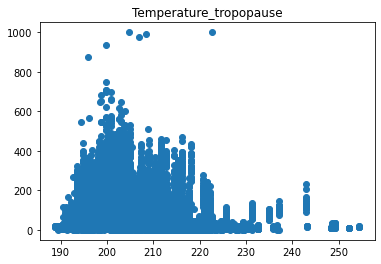

-0.039914870481874885


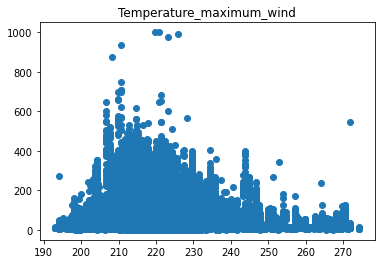

-0.03966563654760856


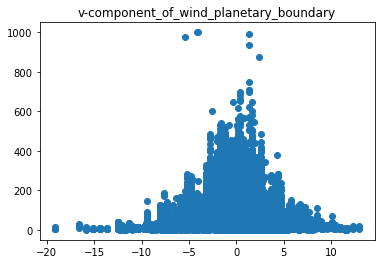

-0.03684131053779515


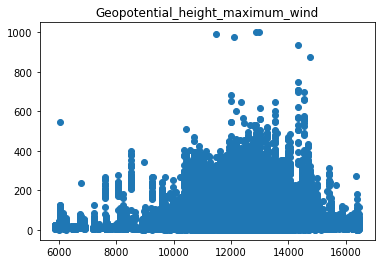

-0.035393367926485064


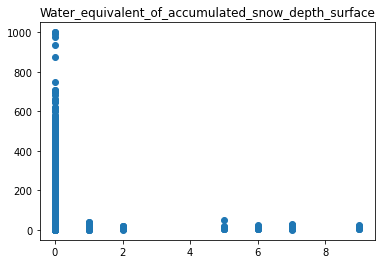

-0.029208733965996134


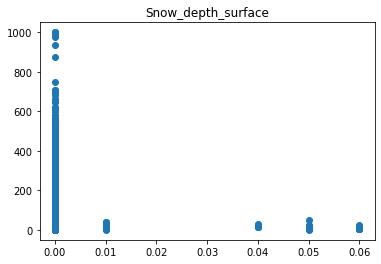

-0.026246970808631264


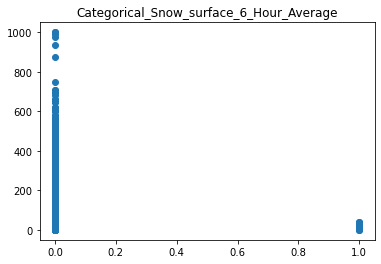

-0.02550310361654619


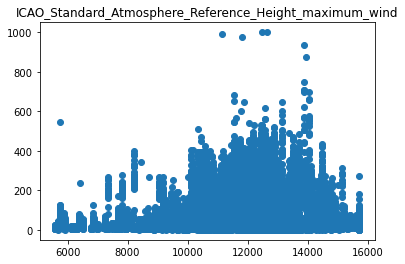

-0.018733193273263622


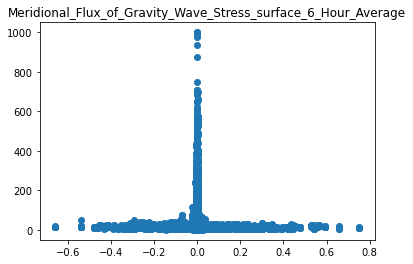

-0.012289562957440821


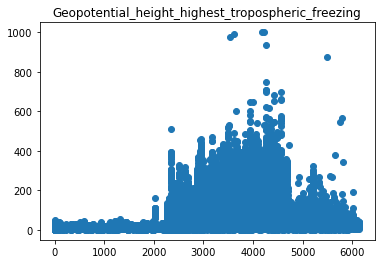

-0.011999624773211377


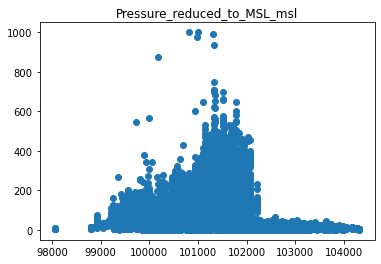

-0.007103946609008364


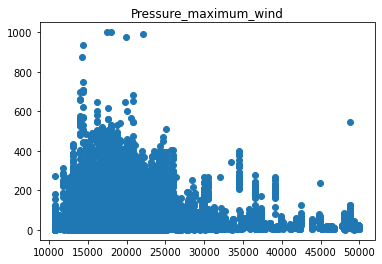

-0.006432458889655244


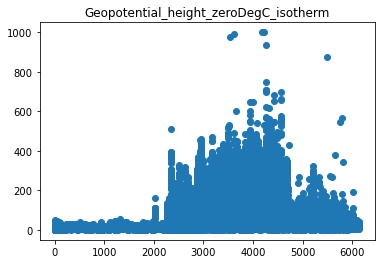

0.006064705783724036


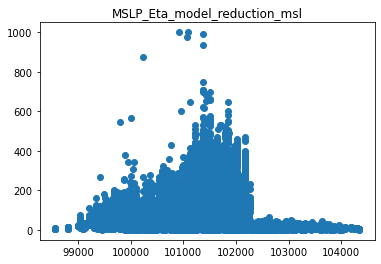

0.006840378804578887


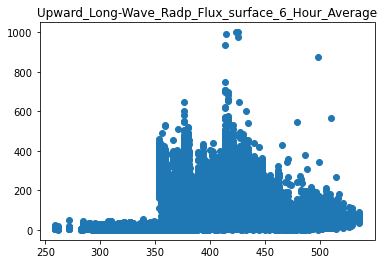

0.03204593398979511


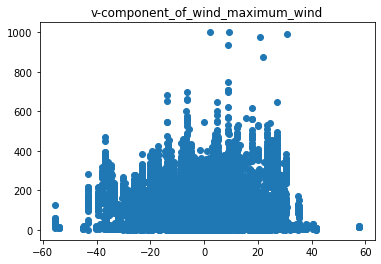

0.04485442089852577


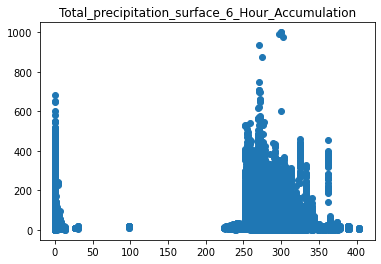

0.07183870226925701


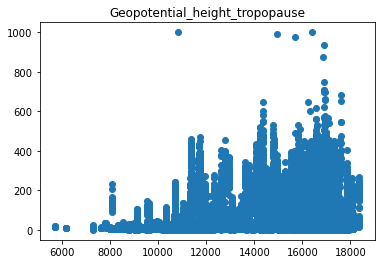

0.07904635063784474


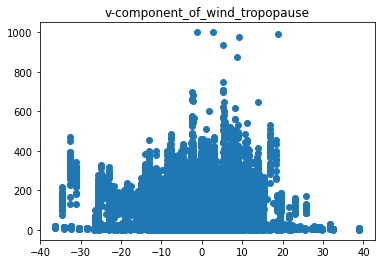

0.09340441575244532


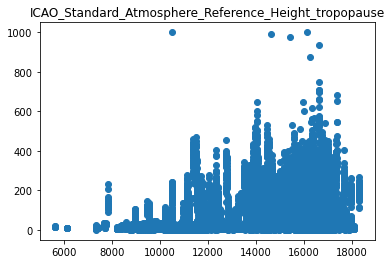

0.1158644565639781


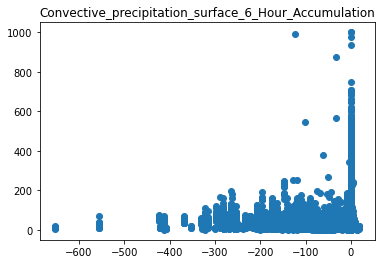

0.11642298351429643


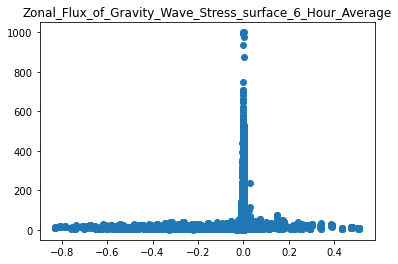

0.12249938693086664


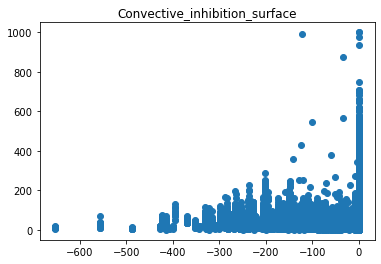

0.13080053699922348


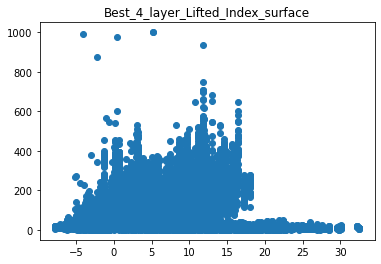

0.2001892716551152


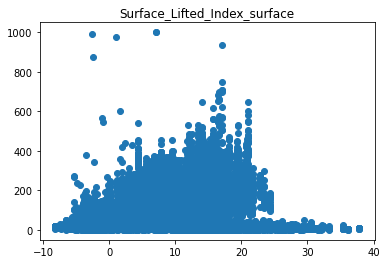

0.2026662873593957


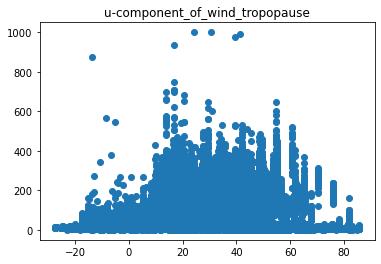

0.21111676415125527


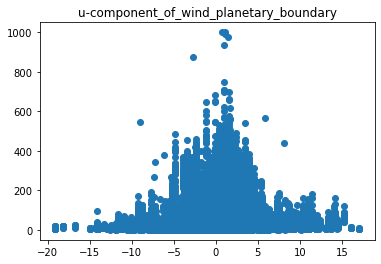

0.2256522875334059


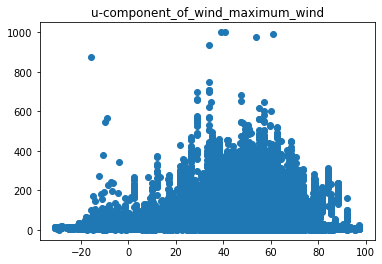

0.2342424480581454


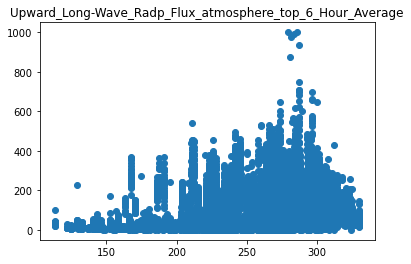

0.3560467485937706


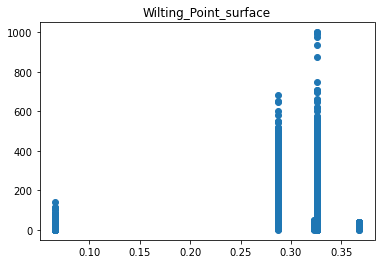

0.35927739623153926


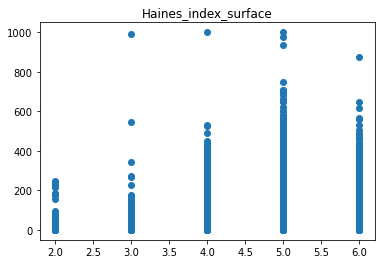

0.35974808482413284


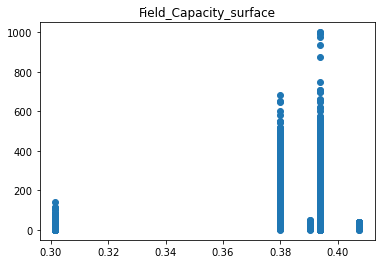

0.44451960610092917


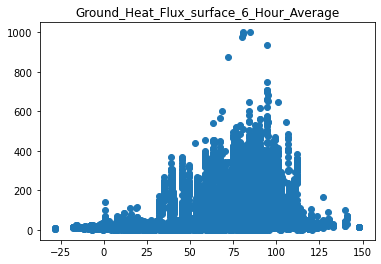

0.4670224670359923


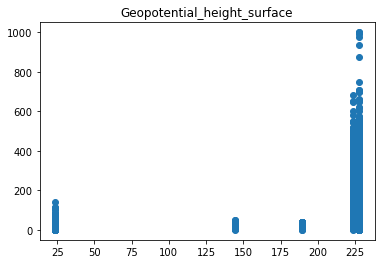

nan


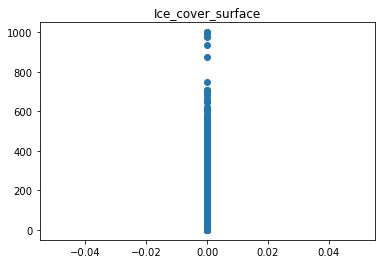

nan


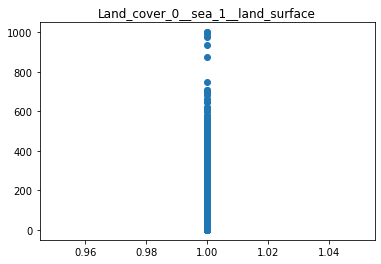

nan


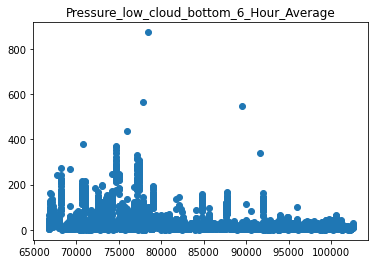

nan


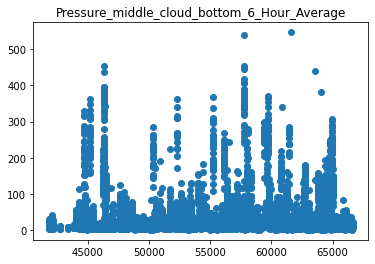

nan


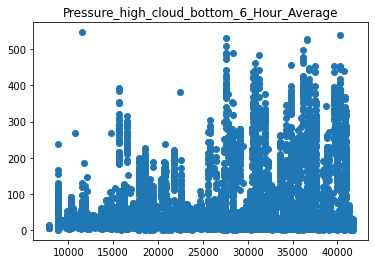

nan


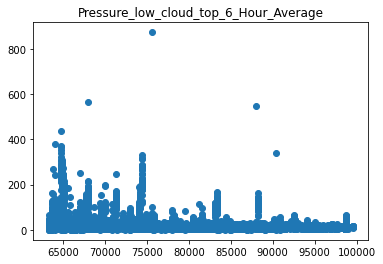

nan


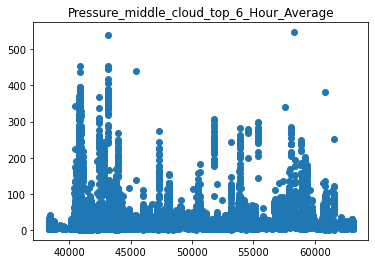

nan


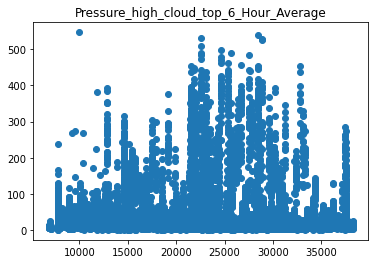

nan


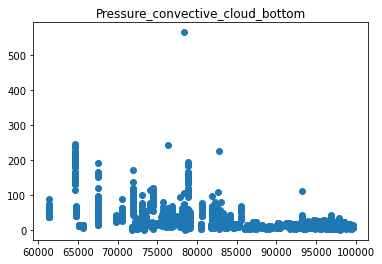

nan


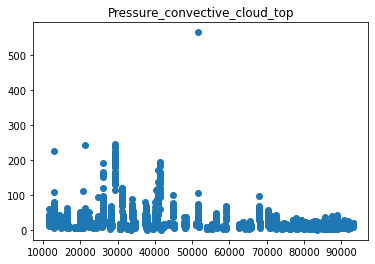

nan


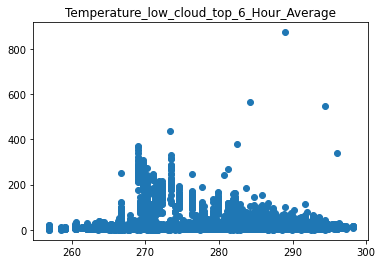

nan


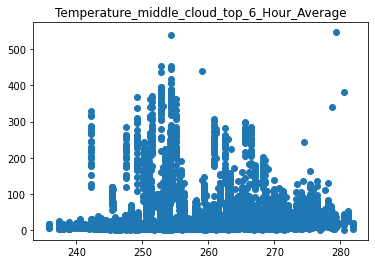

nan


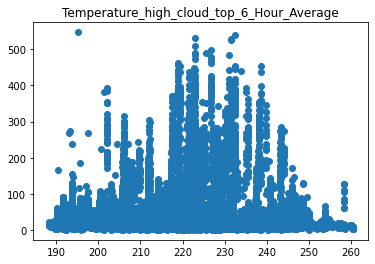

nan


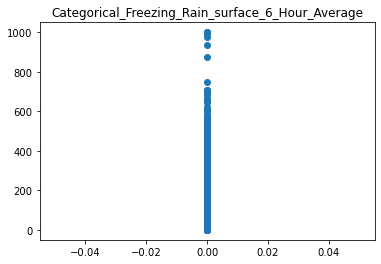

nan


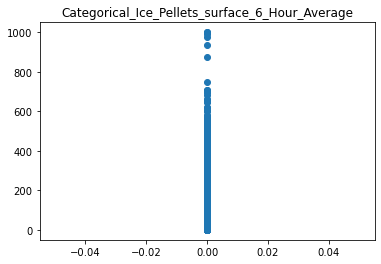

In [8]:
for col in var_correlations['col']:
    print(np.corrcoef(eda_df[col], eda_df['value'])[1][0])
    plt.scatter(eda_df[col], eda_df['value'])
    plt.title(col)
    plt.show()

In [9]:
gfs_forecast_data.columns

Index(['Albedo_surface_6_Hour_Average',
       'Cloud_water_entire_atmosphere_single_layer',
       'Convective_available_potential_energy_surface',
       'Convective_inhibition_surface',
       'Convective_precipitation_surface_6_Hour_Accumulation',
       'Geopotential_height_surface',
       'Geopotential_height_highest_tropospheric_freezing',
       'Geopotential_height_zeroDegC_isotherm',
       'Geopotential_height_maximum_wind', 'Geopotential_height_tropopause',
       'Haines_index_surface',
       'ICAO_Standard_Atmosphere_Reference_Height_maximum_wind',
       'ICAO_Standard_Atmosphere_Reference_Height_tropopause',
       'Ice_cover_surface', 'Land_cover_0__sea_1__land_surface',
       'Latent_heat_net_flux_surface_6_Hour_Average',
       'Momentum_flux_u-component_surface_6_Hour_Average',
       'Precipitable_water_entire_atmosphere_single_layer',
       'Precipitation_rate_surface_6_Hour_Average',
       'Pressure_low_cloud_bottom_6_Hour_Average',
       'Pressure_middle_c

In [10]:
# Drop some of less relevant features
gfs_forecast_data = gfs_forecast_data.drop(columns=['Convective_precipitation_surface_6_Hour_Accumulation', 
                                          'Total_precipitation_surface_6_Hour_Accumulation', 
                                          'Convective_precipitation_surface_6_Hour_Accumulation',
                                          'Pressure_convective_cloud_bottom' , 
                                          'Pressure_low_cloud_bottom_6_Hour_Average',
                                         'Pressure_middle_cloud_bottom_6_Hour_Average',
                                         'Pressure_high_cloud_bottom_6_Hour_Average',
                                         'Pressure_low_cloud_top_6_Hour_Average',
                                         'Pressure_middle_cloud_top_6_Hour_Average',
                                         'Pressure_high_cloud_top_6_Hour_Average',
                                         'Pressure_convective_cloud_top',
                                         'Temperature_low_cloud_top_6_Hour_Average',
                                         'Temperature_middle_cloud_top_6_Hour_Average',
                                         'Temperature_high_cloud_top_6_Hour_Average', 
                                         'Geopotential_height_surface', 
                                         'Geopotential_height_highest_tropospheric_freezing',
                                         'Geopotential_height_zeroDegC_isotherm', 
                                         'Ice_cover_surface', 
                                         'Categorical_Ice_Pellets_surface_6_Hour_Average', 
                                         'Categorical_Freezing_Rain_surface_6_Hour_Average', 
                                         'Land_cover_0__sea_1__land_surface', 
                                         'Field_Capacity_surface',
                                         'Wilting_Point_surface'])

In [11]:
feature_cols = ['Albedo_surface_6_Hour_Average',
       'Cloud_water_entire_atmosphere_single_layer',
       'Convective_available_potential_energy_surface',
       'Convective_inhibition_surface', 'Geopotential_height_maximum_wind',
       'Geopotential_height_tropopause', 'Haines_index_surface',
       'ICAO_Standard_Atmosphere_Reference_Height_maximum_wind',
       'ICAO_Standard_Atmosphere_Reference_Height_tropopause',
       'Latent_heat_net_flux_surface_6_Hour_Average',
       'Momentum_flux_u-component_surface_6_Hour_Average',
       'Precipitable_water_entire_atmosphere_single_layer',
       'Precipitation_rate_surface_6_Hour_Average', 'Pressure_surface',
       'Pressure_maximum_wind', 'Pressure_tropopause',
       'Pressure_reduced_to_MSL_msl', 'Relative_humidity_zeroDegC_isotherm',
       'Relative_humidity_entire_atmosphere_single_layer',
       'Relative_humidity_highest_tropospheric_freezing',
       'Sensible_heat_net_flux_surface_6_Hour_Average', 'Snow_depth_surface',
       'Temperature_surface', 'Temperature_maximum_wind',
       'Temperature_tropopause', 'Total_cloud_cover_low_cloud_6_Hour_Average',
       'Total_cloud_cover_middle_cloud_6_Hour_Average',
       'Total_cloud_cover_high_cloud_6_Hour_Average',
       'Total_cloud_cover_boundary_layer_cloud_6_Hour_Average',
       'Total_cloud_cover_entire_atmosphere_6_Hour_Average',
       'Total_cloud_cover_convective_cloud',
       'Total_ozone_entire_atmosphere_single_layer',
       'Categorical_Rain_surface_6_Hour_Average',
       'Categorical_Snow_surface_6_Hour_Average',
       'Convective_Precipitation_Rate_surface_6_Hour_Average',
       'Potential_Evaporation_Rate_surface', 'Vertical_Speed_Shear_tropopause',
       'Ventilation_Rate_planetary_boundary', 'MSLP_Eta_model_reduction_msl',
       'Zonal_Flux_of_Gravity_Wave_Stress_surface_6_Hour_Average',
       'Meridional_Flux_of_Gravity_Wave_Stress_surface_6_Hour_Average',
       'Planetary_Boundary_Layer_Height_surface',
       'Downward_Short-Wave_Radiation_Flux_surface_6_Hour_Average',
       'Upward_Short-Wave_Radiation_Flux_surface_6_Hour_Average',
       'Upward_Short-Wave_Radiation_Flux_atmosphere_top_6_Hour_Average',
       'Downward_Long-Wave_Radp_Flux_surface_6_Hour_Average',
       'Upward_Long-Wave_Radp_Flux_surface_6_Hour_Average',
       'Upward_Long-Wave_Radp_Flux_atmosphere_top_6_Hour_Average',
       'Cloud_Work_Function_entire_atmosphere_single_layer_6_Hour_Average',
       'Sunshine_Duration_surface', 'Surface_Lifted_Index_surface',
       'Best_4_layer_Lifted_Index_surface',
       'Ground_Heat_Flux_surface_6_Hour_Average',
       'Water_equivalent_of_accumulated_snow_depth_surface',
       'Water_runoff_surface_6_Hour_Accumulation', 'Wind_speed_gust_surface',
       'u-component_of_wind_planetary_boundary',
       'u-component_of_wind_maximum_wind', 'u-component_of_wind_tropopause',
       'v-component_of_wind_planetary_boundary',
       'v-component_of_wind_maximum_wind', 'v-component_of_wind_tropopause']

In [12]:
cleanded_gfs_data = gfs_forecast_data.copy()

In [13]:
scaler = StandardScaler()

cleanded_gfs_data[feature_cols] = scaler.fit_transform(cleanded_gfs_data[feature_cols])


In [14]:
cleanded_gfs_data.to_csv("./cleaned_gfs_data.csv")